# Getting started

Each simulation needs three ingredients:

1. An Array object, which encodes the detectors' positions and their sensitivity to different frequencies.
2. A Pointing object, which determines how the array samples the sky. 
3. A Site object, which determines e.g. the atmospheric conditions and the array's earth-relative position. 

Let's use some of `maria`'s predefined defaults. Here's how we would set up a [MUSTANG-2](https://greenbankobservatory.org/science/gbt-observers/mustang-2/) simulation staring at the zenith for ten minutes:

In [2]:
import matplotlib.pyplot as plt

import maria 
from maria import models

mustang_2 = maria.get_array("MUSTANG-2")
daisy_scan = maria.get_pointing("STARE_0az_90el_600s")
green_bank = maria.get_site("GBT")

We can combine these objects into a total model. An efficient, lightweight model is the linear angular model, which we'll use to simulate the sky temperature at 90 and 150 GHz.

In [11]:
lam = maria.models.LinearAngularModel(array=mustang_2, pointing=daisy_scan, site=green_bank)

NU = [90e9, 150e9]
lam.simulate_temperature(nu=NU, units='K_RJ')

print(lam.temperature.shape)

Sampling layers: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]


(2, 250, 12000)


The simulated time-ordered data is stored `lam.temperature`. We can plot the output:

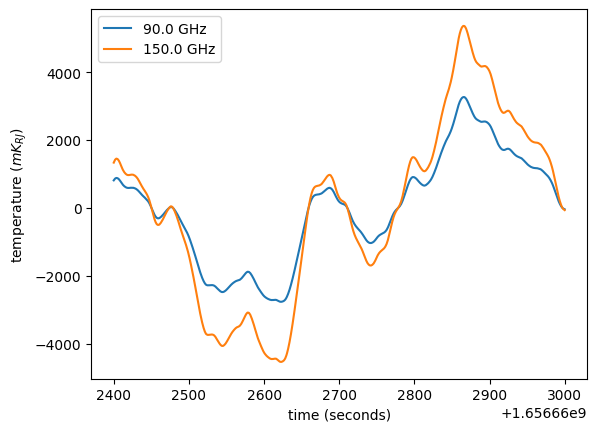

In [13]:
for i_nu, nu in enumerate(NU):

    nu_array_mean = lam.temperature[i_nu].mean(axis=0)
    plt.plot(lam.pointing.unix, 1e3 * (nu_array_mean - nu_array_mean.mean()), label=f'{1e-9*nu} GHz')

plt.xlabel('time (seconds)')
plt.ylabel(r'temperature ($mK_{RJ}$)')
plt.legend()